# Card Class

lets make a simulation of the game war first we need a class for the cards. it will require two variables. also make a tostring method so you can see what your deck looks like fill in the class out line below add safty to raise error if the tank or suits are incorect use if else statements

In [280]:
Rankindex = [2,3,4,5,6,7,8,9,10,"J","Q","K","A"]
suits = ["h","d","c","s"]
class card:
    def __init__(self,rank,suit):
        #Save two variables
        pass
    def __str__(self):
        #return a string that represents the card
        pass
        

use the lists below to make a full deck of cards and lets import random to  shuffle the list you may need a temp variable.

In [323]:
#will be left blank


lets add the comparison functions each each one should return a true or false so you can use it in if statments use the array rankindex to know what card is better.

In [ ]:
__lt__ less than
__gt__ greater than
__eq__ equal

use the array below to add a bit more art to your printing. 

In [ ]:
suitToSym={"h":"♥","d":"♦","c":"♣","s":"♠"}

lets make the simulation for the game war. start by dividing into to pile player1 and player2

In [32]:
#will be left blank
player1 = []
player2 = []
while len(deck)>0:
    player1.append(deck.pop(0))
    player2.append(deck.pop(0))
print(len(player1),len(player2))
print(player1[0],player2[0])

make a function for one turn players compare their first cards and put them at the bottom of the winners deck. define aditional plies for the cards in a war and make sure that you alow for double wars through recersion or loops. becareful to not get index error if you run out of cards you lose.

put this function in a while loop untill someone loses

next lets add some more effects to our program import time and use time.sleep to build tention. also clear the screen so it is more readable


In [33]:
import time 
from IPython.display import clear_output
print("i will disapear")
time.sleep(1)
clear_output()

provide print outs of the game as it is played who wins and lose or when there is a war


then
keep tract of how many cards each player has during the game and make a graph of their card count over time also add a variable to end the game after 500 rounds other wise it may go on forever.

     player 1 - player 2
cards   4        48
      7♥     7♣
             war


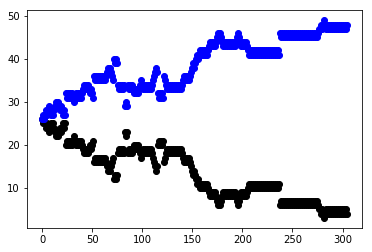

In [34]:
#final this show the whole program in one cell what it should look like now
import time 
from IPython.display import clear_output
import matplotlib.pyplot as plt
forceEnd = 500


suitToSym={"h":"♥","d":"♦","c":"♣","s":"♠"}
Rankindex = [2,3,4,5,6,7,8,9,10,"J","Q","K","A"]
class card:
    def __init__(self,rank,suit):
        self.rank = rank
        self.suit = suit
    def __lt__(self,other):
        return Rankindex.index(self.rank)<Rankindex.index(other.rank)
    def __gt__(self,other):
        return Rankindex.index(self.rank)>Rankindex.index(other.rank)
    def __eq__(self,other):
        return self.rank==other.rank
    def __str__(self):
        return(str(self.rank)+suitToSym[self.suit[0].lower()])
    
    
    
import random
deck = []
suits = ["hearts","diamonds","clubs","spades"]
rank = [2,3,4,5,6,7,8,9,10,"J","Q","K","A"]
for i in suits:
    for j in rank:
        deck.append(card(j,i))

temp = None
for i in range(0,len(deck)):
    index = random.randint(0,len(deck)-1)
    temp = deck[i]
    deck[i] = deck[index]
    deck[index] = temp
for i in deck:
    break
    print(i)

player1 = []
player2 = []
while len(deck)>0:
    player1.append(deck.pop(0))
    player2.append(deck.pop(0))
print(len(player1),len(player2))
print(player1[0],player2[0])
player1ccount = []
player2ccount = []
wins = 0
pile = []
def turn(p1,p2,pe,wins):
    card1 =p1.pop(0)
    card2 =p2.pop(0)
    pe.append(card1)
    pe.append(card2)
    if card1>card2:
        print("            p1 win")
        for i in pe:
            p1.append(i)
        pe = []
        wins+=1
    elif card1<card2:
        print("            p2 win")
        for i in pe:
            p2.append(i)
        pe = []
    elif card1==card2:
        print("             war")
        if len(p1)<4:
            return([],p2,pe,wins)
        if len(p2)<4:
            return(p1,[],pe,wins+1)
        for i in range(0,3):
            pe.append(p1.pop(0))
            pe.append(p2.pop(0))
        result = turn(p1,p2,pe,wins)
        p1=result[0]
        p2=result[1]
        pe=result[2]
        wins=result[3]

    return(p1,p2,pe,wins)
while len(player1)!=0 and len(player2)!=0 and forceEnd>0:
    #recoding stuff
    pile = []
    #recod cards for each player
    player1ccount.append(len(player1))
    player2ccount.append(len(player2))
    #display current stats
    clear_output()
    print("     player 1 - player 2") #center is 15
    print("cards   "+str(len(player1))+"        "+str(len(player2)))
    print("      "+str(player1[0])+"     "+str(player2[0]))
    #play a round
    result = turn(player1,player2,pile,wins)
    #save the results
    player1=result[0]
    player2=result[1]
    wins=result[3]
    #pauses to read
    time.sleep(.1)
    #input("continue")
    forceEnd-=1#it will end at some point
for i,v in enumerate(player1ccount):
    plt.plot(i,v,"-ok")
for i,v in enumerate(player2ccount):
    plt.plot(i,v,"-ob")

plt.show()

Finlay lets add save a few accesors variables to get and set the suit and rank of the cards. also add accesor fuction to get the rankindex and suitTosym lists make sure they work by using the random choice to test a 10 randomly generated cards

In [36]:
#This is what should go into the file cardclass.py
suitToSym={"h":"♥","d":"♦","c":"♣","s":"♠"}
Rankindex = [2,3,4,5,6,7,8,9,10,"J","Q","K","A"]
def getSuitToSym():
    return suitToSym
def getRankindex():
    return Rankindex
class card:
    def __init__(self,rank,suit):
        if isinstance(rank,str):
            rank = rank.upper()
        if rank in Rankindex:
            self.rank = rank
        else:
            raise ValueError("rank not availible")
        if suit[0] in suitToSym.keys():
            self.suit = suit[0].lower()
        else:
            raise ValueError("suit not availible")
    def getSuit(self):
        return self.suit[0]
    def getRank(self):
        return self.rank
    def setSuit(self,suit):
        self.suit = suit[0]
    def setRank(self,rank):
        self.rank = rank
    def __lt__(self,other):
        return Rankindex.index(self.rank)<Rankindex.index(other.rank)
    def __gt__(self,other):
        return Rankindex.index(self.rank)>Rankindex.index(other.rank)
    def __eq__(self,other):
        return self.rank==other.rank
    def __str__(self):
        return(str(self.rank)+str(suitToSym[self.suit[0].lower()]))

In [38]:
#testing getter
import random
suitToSym={"h":"♥","d":"♦","c":"♣","s":"♠"}
Rankindex = [2,3,4,5,6,7,8,9,10,"J","Q","K","A"]
for i in range(10):
    r=random.choice(Rankindex)
    s=random.choice(list(suitToSym.keys()))
    c = card(r,s)
    print(c.getSuit())
    print(c.getRank())
    print(c)

d
9
9♦
d
7
7♦
c
A
A♣
c
10
10♣
c
3
3♣
c
2
2♣
h
2
2♥
h
A
A♥
h
3
3♥
s
5
5♠


finaly save of the class as a py file called cardclass.py

we will use it later make sure it is in the save directory that you are working in.